In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.linalg import svd
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

warnings.filterwarnings('ignore')

In [2]:
human_data = pd.read_csv('../b. Datasets/Human Activity Recognition/Human Activity Clustering Dataset.csv')
data_untouched = human_data.copy(deep=True)

In [3]:
data_untouched.activity.nunique()

6

In [4]:
display(human_data.head(2))
display(human_data.tail(2))

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.110,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.231,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.103,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.596,-0.4760,0.116,-0.852,0.188,-0.0347


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3607,10280,WALKING_UPSTAIRS,0.207,0.0246,-0.1040,-0.3650,-0.169,-0.216,-0.449,-0.186,...,-0.2140,-0.352,-0.7340,0.535,-0.2570,0.927,-0.0843,-0.657,0.267,0.188
3608,10281,WALKING_DOWNSTAIRS,0.393,-0.0178,-0.0902,-0.0963,-0.174,-0.257,-0.153,-0.208,...,0.0894,0.274,-0.0368,-0.743,-0.0802,0.927,-0.6520,-0.807,0.190,0.118


In [5]:
human_data.shape

(3609, 563)

In [6]:
human_data.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [7]:
human_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [8]:
human_data.isna().sum().sum()

0

In [9]:
human_data.select_dtypes('object').columns

Index(['activity'], dtype='object')

In [10]:
human_data.drop(labels='activity', axis=1, inplace=True)

In [11]:
corr_matrix = human_data.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = upper_triangle.stack().reset_index()
high_corr_features.columns = ["Feature1", "Feature2", "Correlation"]
high_corr_features = high_corr_features[high_corr_features["Correlation"] > 0.8]

high_corr_features

,Feature1,Feature2,Correlation
2238,tBodyAcc.std.X,tBodyAcc.std.Y,0.924174
2239,tBodyAcc.std.X,tBodyAcc.std.Z,0.867681
2240,tBodyAcc.std.X,tBodyAcc.mad.X,0.998675
2241,tBodyAcc.std.X,tBodyAcc.mad.Y,0.917302
2242,tBodyAcc.std.X,tBodyAcc.mad.Z,0.862121
...,...,...,...
157537,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.iqr,0.982346
157538,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.entropy,0.893217
157550,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,0.859590
157563,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,0.886348


In [12]:
high_corr_pairs = (corr_matrix > 0.8).sum().sum() - len(corr_matrix)
high_corr_pairs //= 2
high_corr_pairs

22912

In [13]:
standard_scaler = StandardScaler()
human_data_features = human_data.columns
human_data = pd.DataFrame(standard_scaler.fit_transform(human_data), 
                          columns=human_data_features)

In [14]:
pca = PCA(n_components=15)
pca_data = pca.fit_transform(human_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = len(cumulative_variance)
print("Cumulative variance:", cumulative_variance)

Cumulative variance: [0.50727003 0.57200118 0.59955633 0.62318721 0.64208995 0.65815799
 0.67176068 0.68369407 0.69318037 0.70238089 0.71118848 0.71922351
 0.72700219 0.73373795 0.74023035]


In [15]:
pca_feature_name_list = ["PC" + str(i) for i in range(1, num_components + 1)]
pca_data = pd.DataFrame(data=pca_data, columns=pca_feature_name_list)

In [16]:
display(pca_data.head(2))
display(pca_data.tail(2))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-15.139129,3.239533,-1.646735,2.837492,3.274451,-0.612954,-0.422787,0.298559,0.052135,-0.926738,-0.083238,-1.252420,-0.432776,-0.596592,0.840400
1,-14.537446,3.296288,-2.674733,3.107398,1.886045,1.235702,-0.440991,-1.020192,1.814504,1.173515,0.439758,-0.321791,-1.430420,-1.542853,1.784143


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
3607,7.721319,-6.610880,0.423062,4.025680,-2.294205,0.189061,-2.523548,-0.956323,-0.686349,-1.137654,-0.713538,-3.562617,-2.568103,-1.037691,0.040741
3608,15.629392,1.107435,-3.076688,0.885201,-3.060144,6.348142,-4.358164,-3.676337,-0.804017,-2.033286,-0.250405,0.432399,0.819681,0.118454,-5.301369


In [17]:
pca_data.skew()

PC1     0.705294
PC2     0.411866
PC3     1.889458
PC4    -0.038688
PC5     0.406993
PC6    -0.087598
PC7     0.016762
PC8     0.520856
PC9     0.933354
PC10    0.237734
PC11    0.554875
PC12    0.511307
PC13    0.160858
PC14    0.471168
PC15   -0.066895
dtype: float64

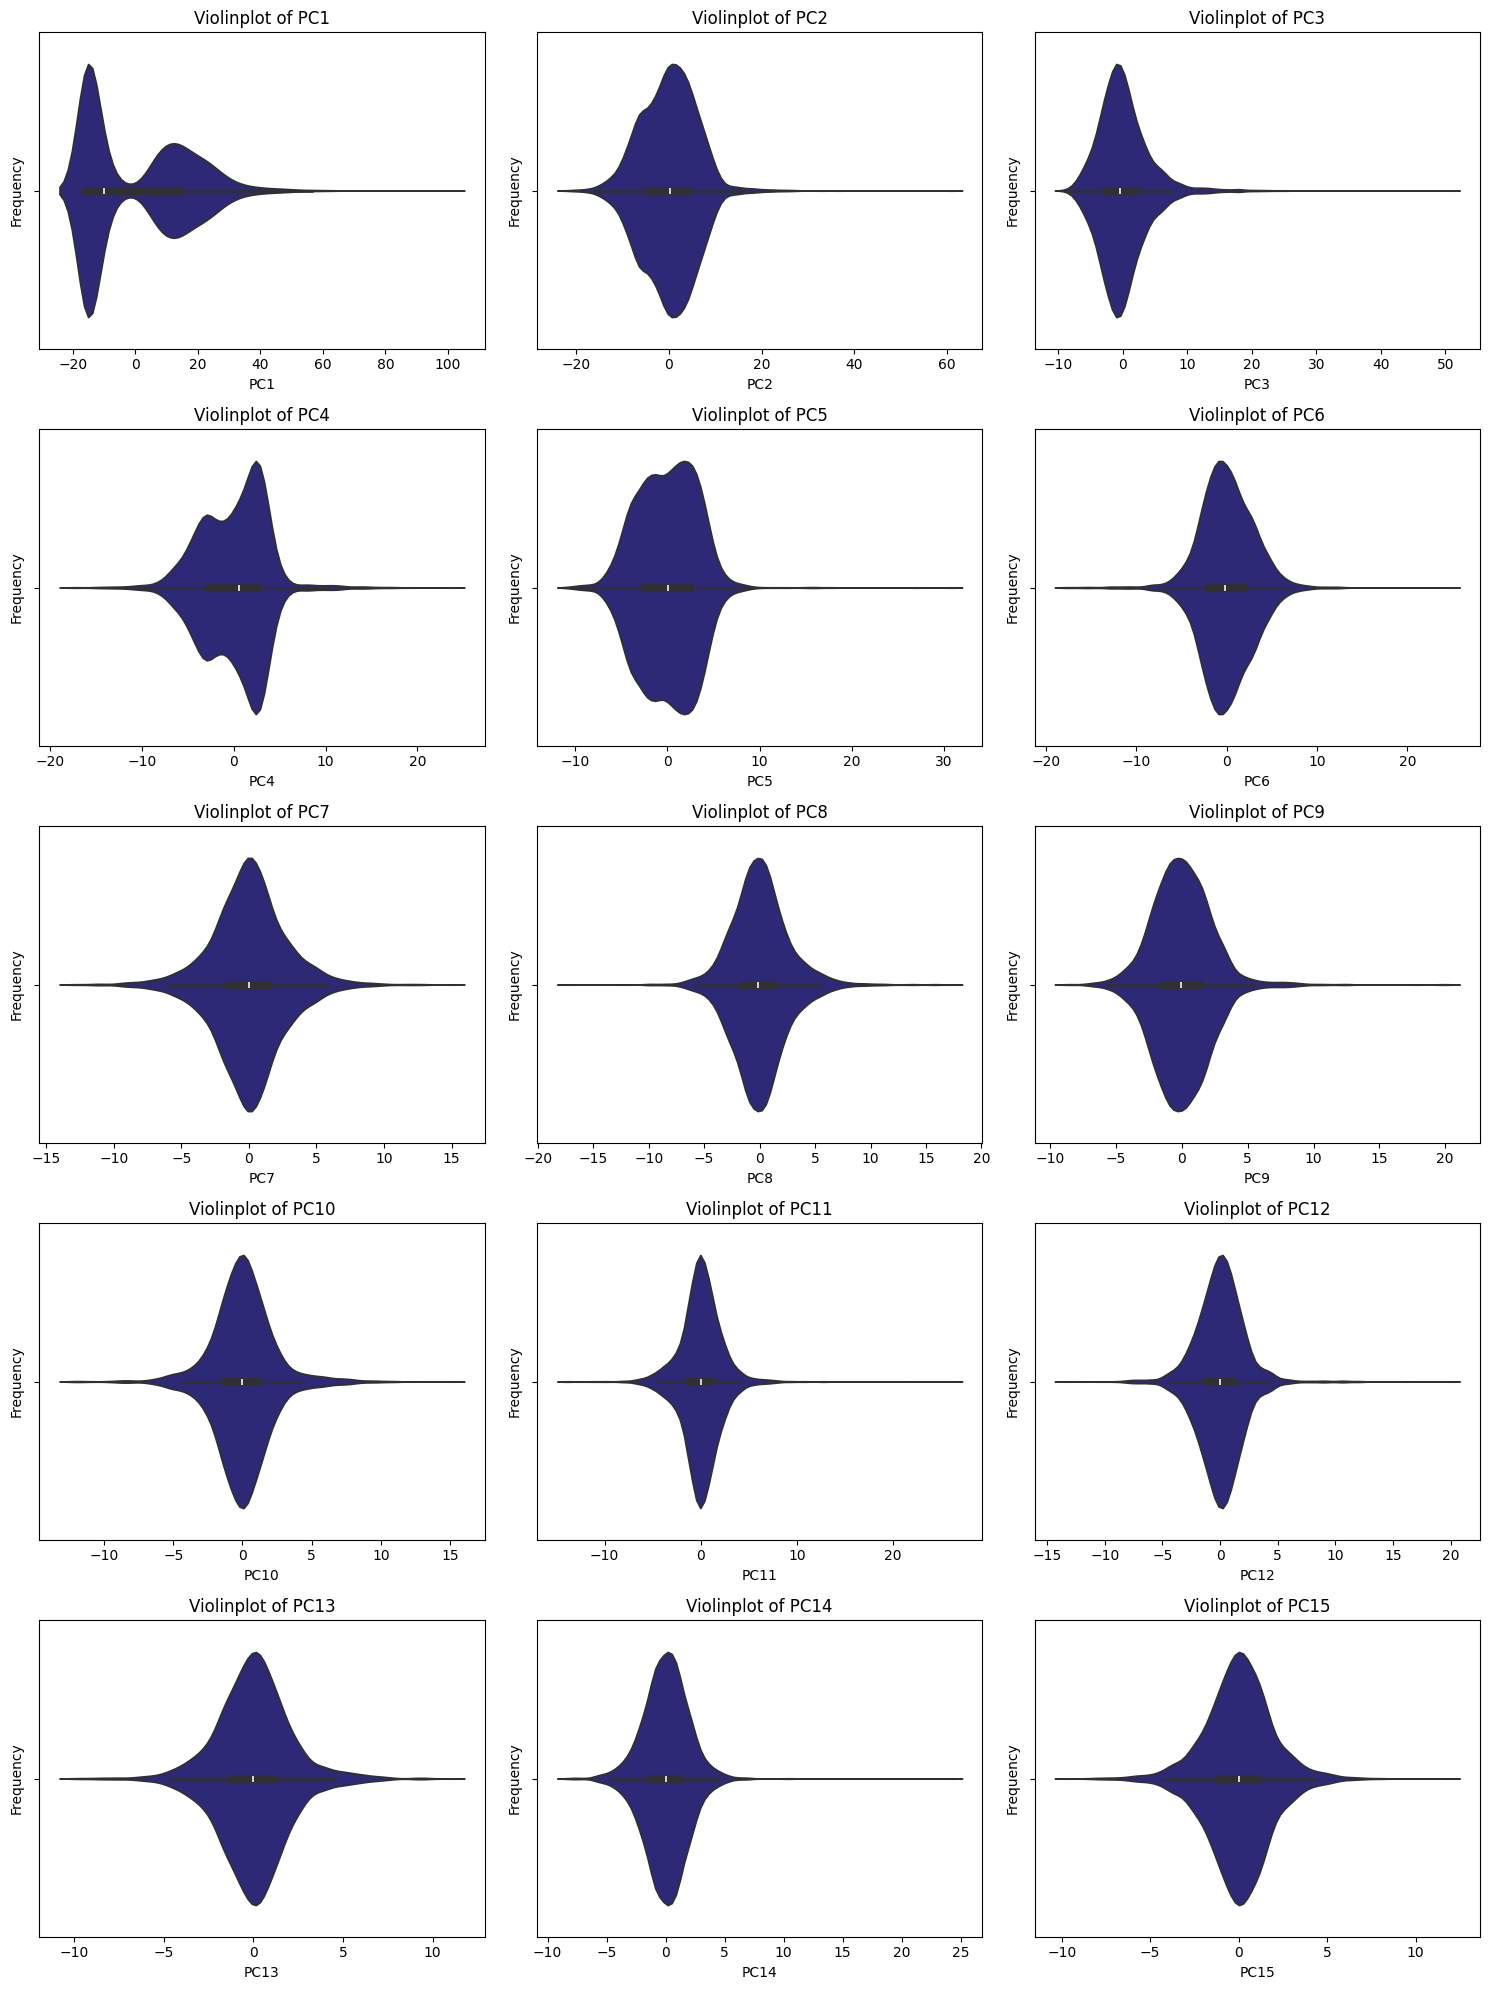

In [18]:
num_columns = pca_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.violinplot(data=pca_data, x=column, ax=axes[i], color='#211C84')
    axes[i].set_title(f'Violinplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Random Forest Classifier

In [19]:
encoded_activity = data_untouched['activity']
encoded_activity.head(2)

0    STANDING
1    STANDING
Name: activity, dtype: object

In [20]:
X = human_data
y = encoded_activity

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [22]:
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))
display(y_test.head(2))

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3161,1.311631,0.054362,-0.483402,-0.316760,-0.884871,-0.888702,-0.925047,-0.877109,-0.886905,-0.934348,...,-1.597557,-1.368855,-1.091936,-0.200964,0.001149,1.303629,1.943167,-0.614656,0.488203,-0.004919
2402,0.576257,-0.464669,-0.013729,0.506941,-0.839323,-0.940540,-0.854952,-0.831119,-0.944611,-0.843180,...,1.503452,-1.019709,-0.819439,-0.630822,0.104511,-0.463196,0.374178,1.938040,-2.184765,-1.226980


,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
911,-0.856849,0.085818,0.009755,-0.032111,-0.884871,-0.970447,-0.960094,-0.877109,-0.971403,-0.967270,...,1.757360,-0.588782,-0.624798,0.491986,0.102061,0.333831,-1.310957,1.839859,-2.444994,-0.855625
2498,0.671372,0.164459,0.485534,-1.722210,0.661487,1.057637,0.604524,0.618763,1.115094,0.574983,...,-1.339487,0.672862,0.351650,-0.050604,-0.921088,1.508998,-0.190251,-0.685346,0.456076,0.342564


3161    STANDING
2402      LAYING
Name: activity, dtype: object

911                 LAYING
2498    WALKING_DOWNSTAIRS
Name: activity, dtype: object

In [23]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_test_pred = rfc_model.predict(X_test)
accuracy_val = accuracy_score(y_test, y_test_pred)
print("Accuracy is", accuracy_val)
print("Classification report:\n", classification_report(y_test, y_test_pred))

Accuracy is 0.9667774086378738
Classification report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       171
           SITTING       0.95      0.92      0.93       156
          STANDING       0.94      0.95      0.94       167
           WALKING       0.99      0.99      0.99       151
WALKING_DOWNSTAIRS       0.97      0.96      0.96       123
  WALKING_UPSTAIRS       0.97      0.99      0.98       135

          accuracy                           0.97       903
         macro avg       0.97      0.97      0.97       903
      weighted avg       0.97      0.97      0.97       903



In [25]:
pca = PCA(n_components=0.80)
pca_85 = pca.fit_transform(human_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

In [26]:
pca_85 = pd.DataFrame(pca_85)
pca_85.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-15.139129,3.239533,-1.646738,2.837497,3.274434,-0.612869,-0.422495,0.298755,0.055784,-0.931818,...,-0.615788,0.160481,0.177643,-0.857986,-0.716312,0.471203,-0.115387,-0.066310,0.192707,1.630108
1,-14.537446,3.296288,-2.674734,3.107395,1.886057,1.235772,-0.440868,-1.020214,1.816711,1.169639,...,-0.983772,1.777380,0.260343,-0.232814,-0.508076,0.433342,0.517833,0.743138,0.779466,1.345485


In [27]:
X = pca_85
y = encoded_activity

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [29]:
rfc_model_pca = RandomForestClassifier()
rfc_model_pca.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_test_pred = rfc_model_pca.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9036544850498339

### SVD

In [31]:
u, s, Vh = svd(human_data)

In [32]:
u.shape, s.shape, Vh.shape

((3609, 3609), (562,), (562, 562))

### Truncated SVD

In [33]:
trunc_svd = TruncatedSVD(n_components=10)
svd_data = pd.DataFrame(trunc_svd.fit_transform(human_data))

In [34]:
pd.DataFrame(svd_data.head(2))

,0,1,2,3,4,5,6,7,8,9
0,-15.139129,3.239533,-1.646753,2.837572,3.274653,-0.613548,-0.420839,0.294948,0.077695,-0.933413
1,-14.537446,3.296288,-2.674745,3.107395,1.885991,1.235628,-0.441152,-1.017333,1.808482,1.169270


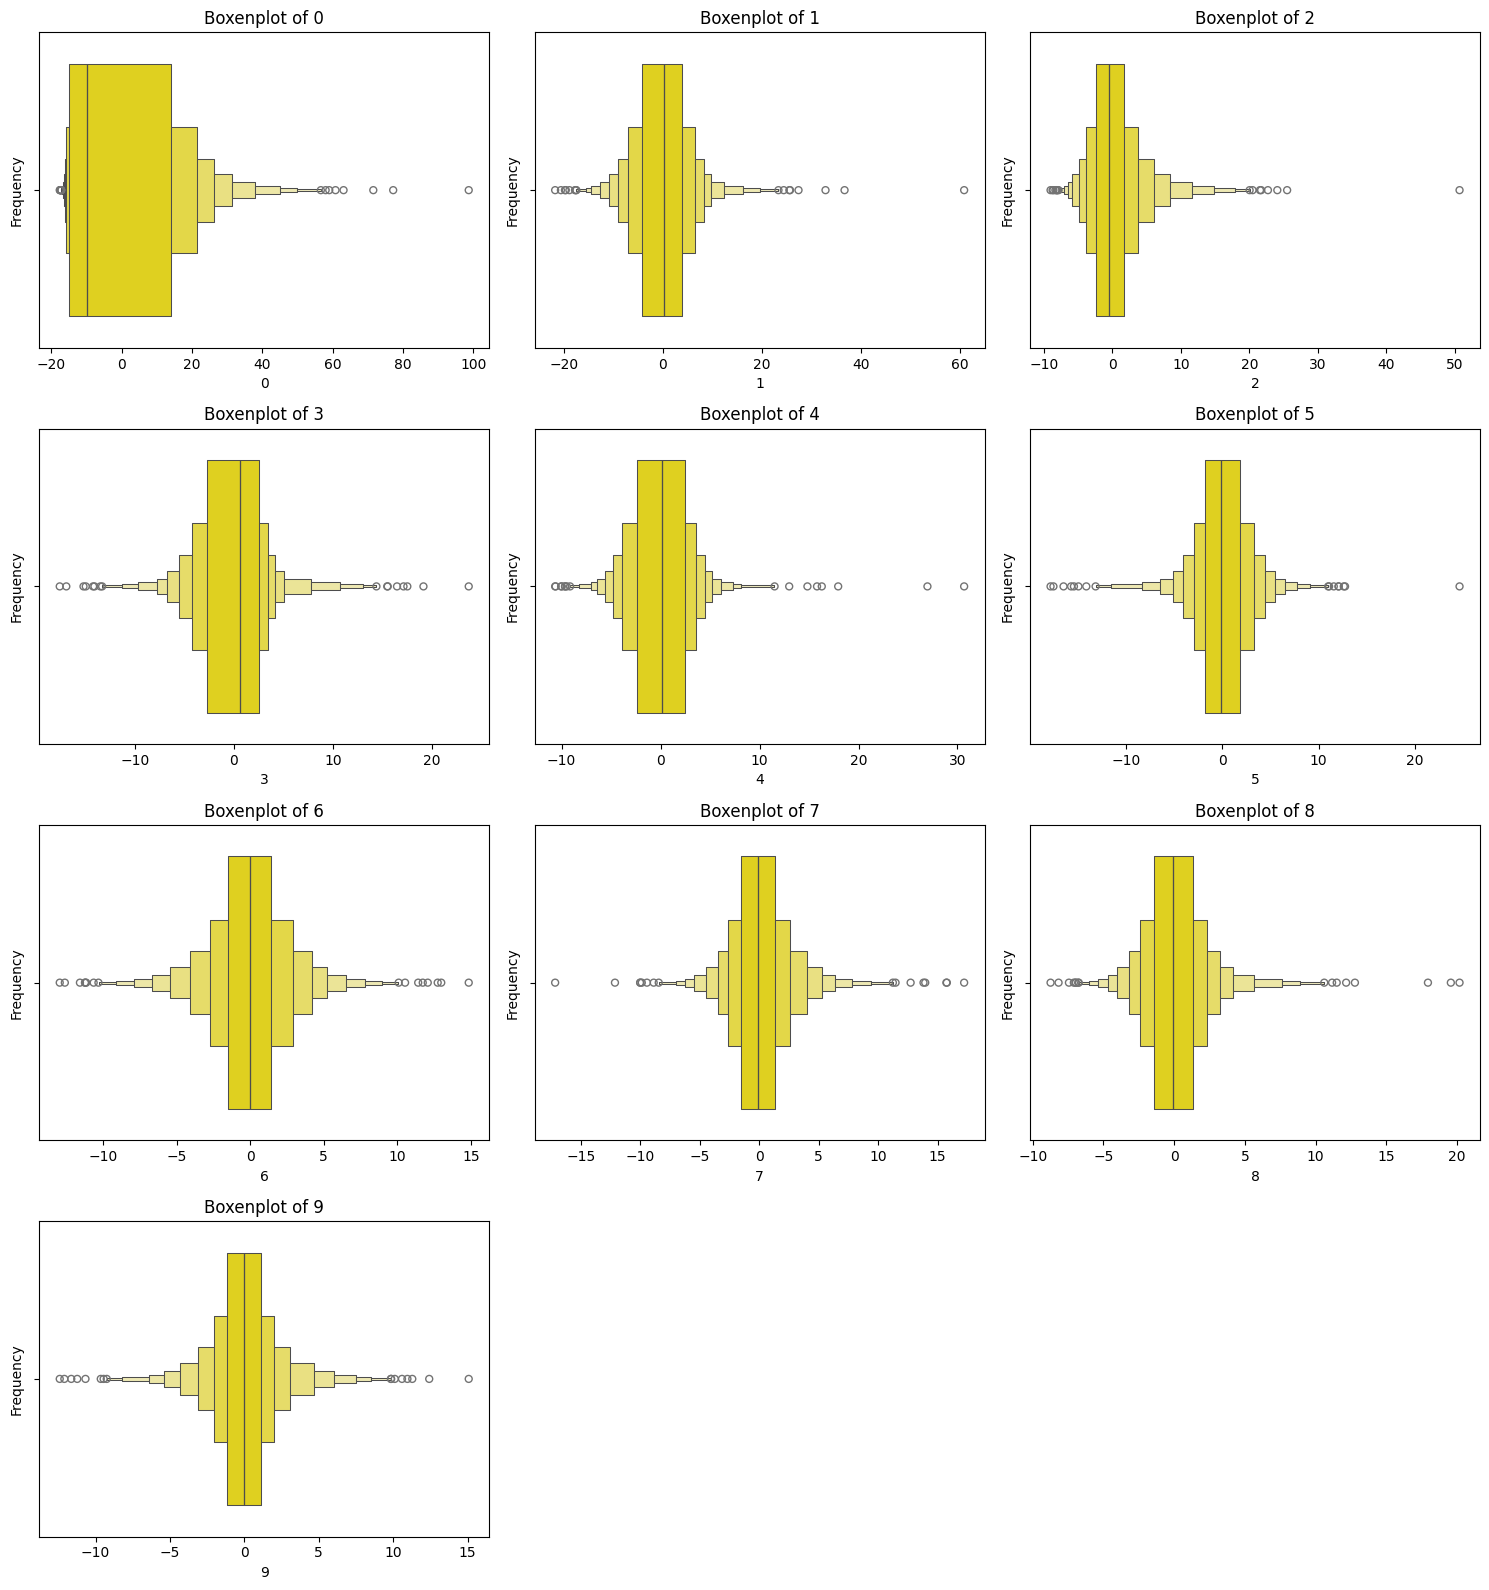

In [35]:
num_columns = svd_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxenplot(data=svd_data, x=column, ax=axes[i], color='#FFEB00')
    axes[i].set_title(f'Boxenplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(svd_data, encoded_activity, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    random_state=0, 
                                                    stratify=encoded_activity)

In [37]:
rfc_trunc_svd = RandomForestClassifier()
rfc_trunc_svd.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_test_pred = rfc_trunc_svd.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8803986710963455

### Linear Discriminant Analysis

In [39]:
human_data.shape

(3609, 562)

In [40]:
y = data_untouched['activity'].squeeze()

In [41]:
n_classes=data_untouched['activity'].nunique()

lda = LinearDiscriminantAnalysis(n_components=min(103, n_classes - 1))
lda_data = pd.DataFrame(lda.fit_transform(human_data, y))
lda_data.head(2)

,0,1,2,3,4
0,-8.249053,-8.331171,0.056597,0.359676,2.356734
1,-8.871340,-8.619388,-0.152375,0.874302,1.596480


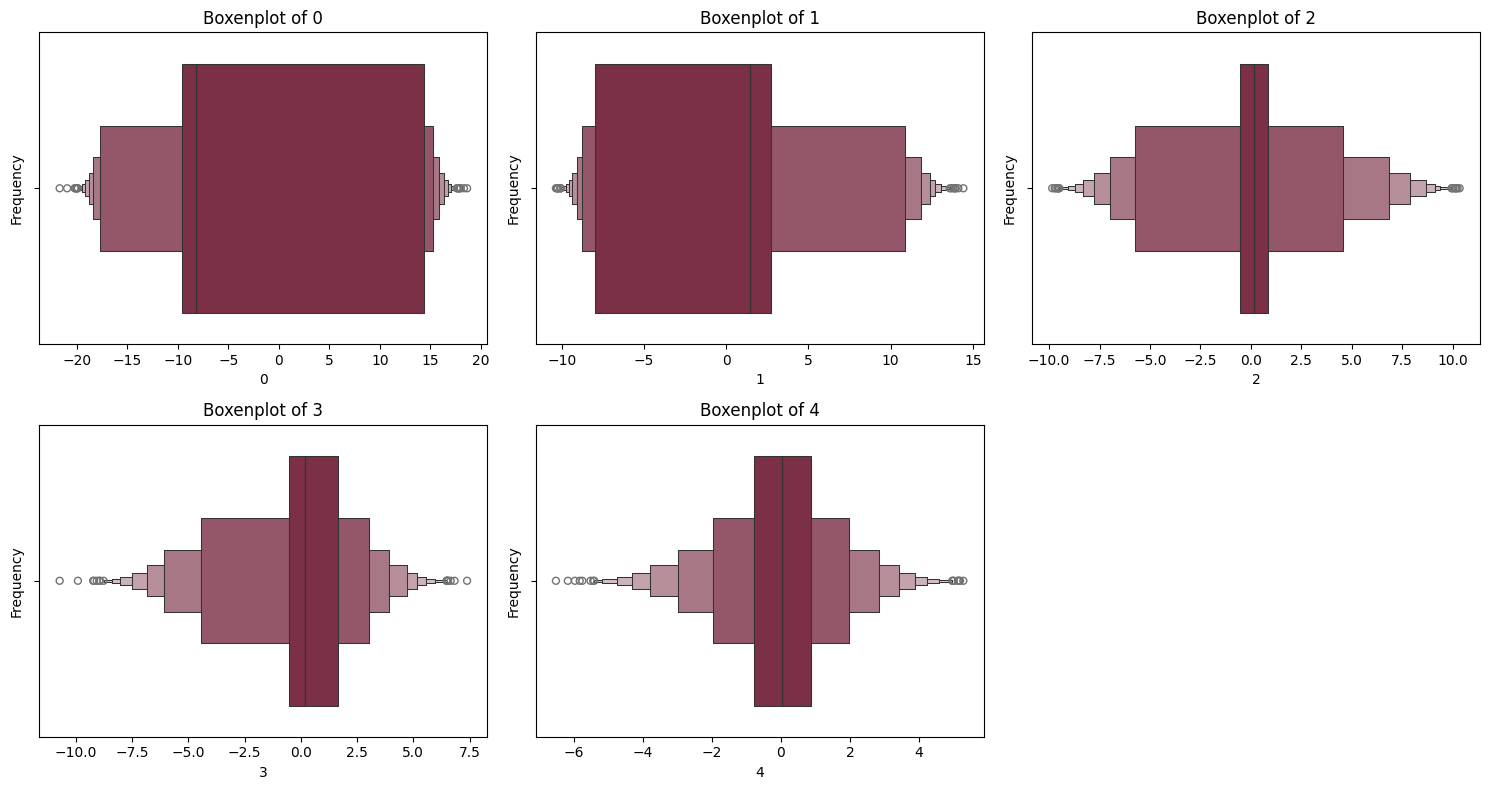

In [42]:
num_columns = lda_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxenplot(data=lda_data, x=column, ax=axes[i], color='#872341')
    axes[i].set_title(f'Boxenplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(lda_data, y, 
                                                    test_size=0.25, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [44]:
rfc_lda = RandomForestClassifier()
rfc_lda.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_test_pred = rfc_lda.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9922480620155039

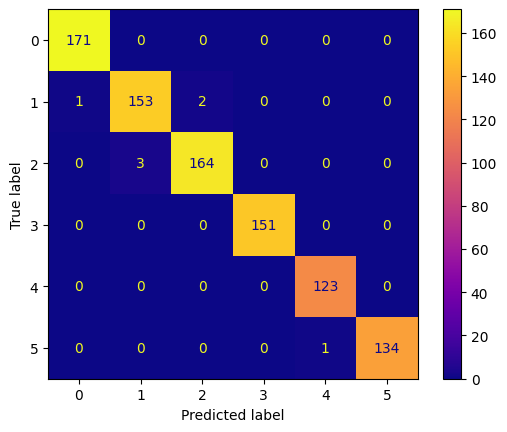

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(cmap='plasma')

In [47]:
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       171
           SITTING       0.98      0.98      0.98       156
          STANDING       0.99      0.98      0.98       167
           WALKING       1.00      1.00      1.00       151
WALKING_DOWNSTAIRS       0.99      1.00      1.00       123
  WALKING_UPSTAIRS       1.00      0.99      1.00       135

          accuracy                           0.99       903
         macro avg       0.99      0.99      0.99       903
      weighted avg       0.99      0.99      0.99       903



In [48]:
submission_df = pd.DataFrame({
    'Index': X_test.index,
    'Activity': y_test_pred
}).sort_values(by='Index', ascending=True)
display(submission_df.head(2))
display(submission_df.tail(2))

,Index,Activity
554,2,STANDING
184,4,STANDING


,Index,Activity
64,3603,WALKING_UPSTAIRS
800,3604,WALKING_UPSTAIRS


In [49]:
submission_df.to_csv('../d. Output Files/Human Activity Recognition/Human Activity Classification.csv', index=False)

## Clustering

In [50]:
cluster_range = range(2, 15)
inertia_list = []

for k in cluster_range:
    k_means_model = KMeans(n_clusters=k, init='k-means++')
    cluster_labels = k_means_model.fit_predict(pca_data)
    inertia_list.append(k_means_model.inertia_)

In [51]:
kneedle = KneeLocator(cluster_range, 
                      inertia_list, 
                      curve='convex', 
                      direction='decreasing')
optimum_clusters = kneedle.elbow
print("The optimum number of clusters by the Knee Locator (Elbow method) is", optimum_clusters)

The optimum number of clusters by the Knee Locator (Elbow method) is 6


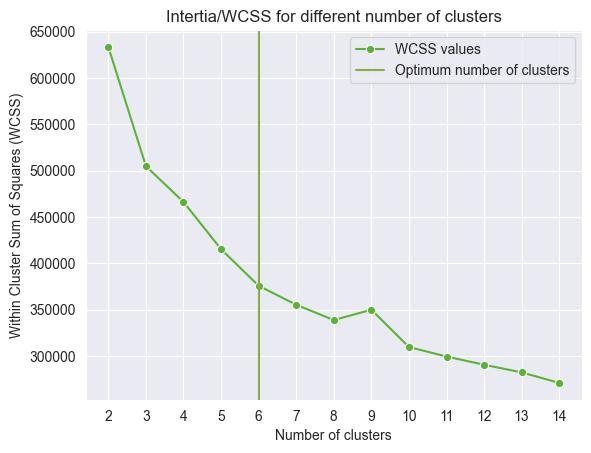

In [52]:
sns.set_style('darkgrid')
sns.lineplot(y=inertia_list, x=cluster_range, marker='o', color='#5CB338', label="WCSS values")
plt.xticks(cluster_range)
plt.axvline(x=optimum_clusters, color='#89AC46', label='Optimum number of clusters')
plt.xlabel("Number of clusters")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Intertia/WCSS for different number of clusters")
plt.legend()
plt.show()

### Agglomerative Clustering

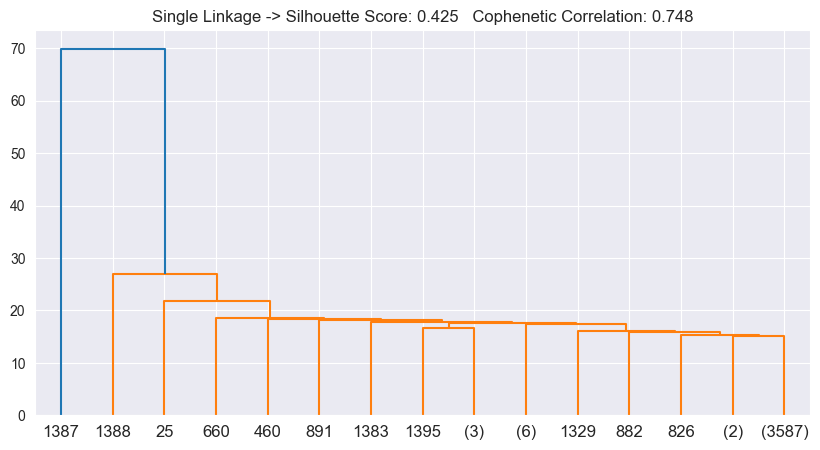

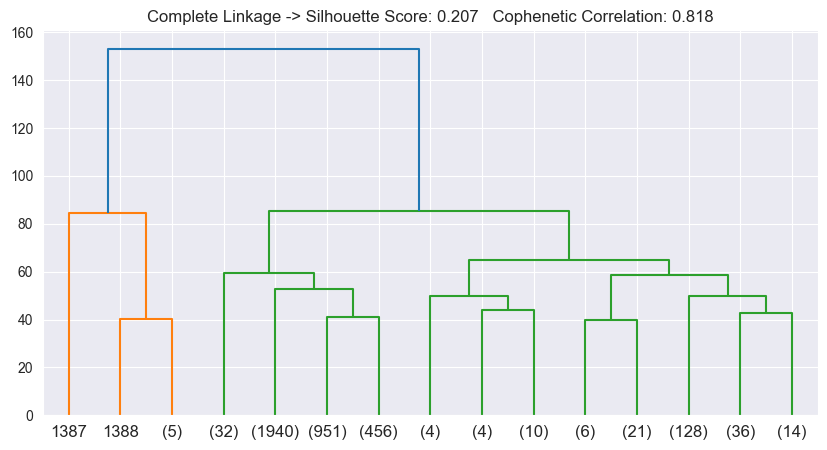

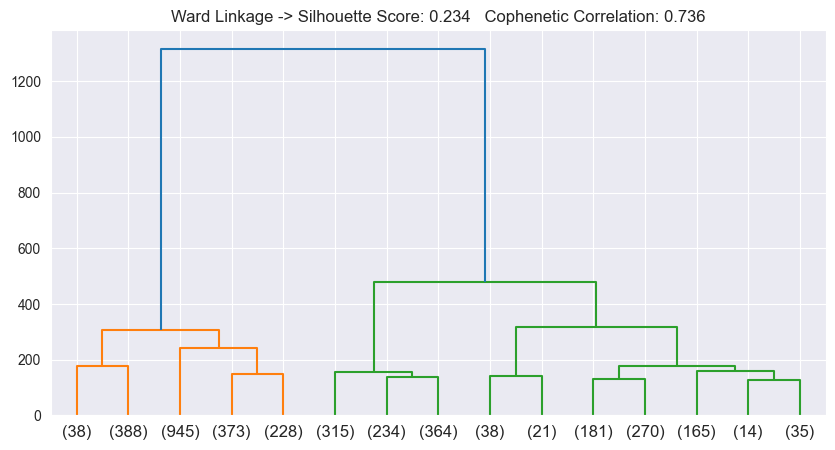

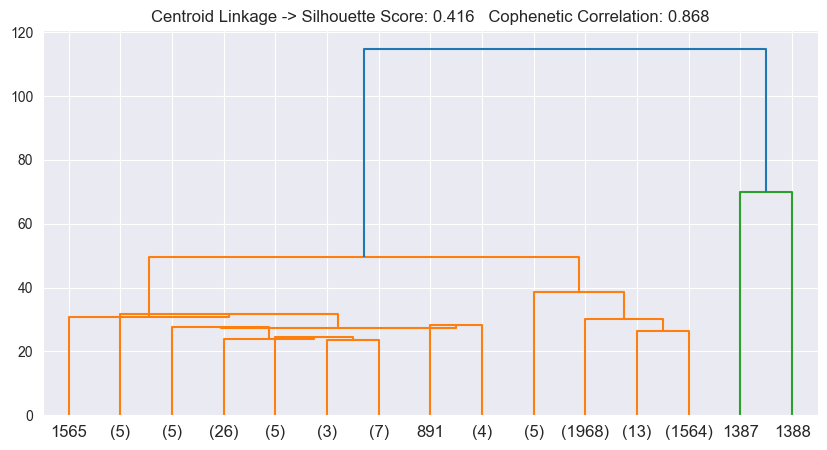

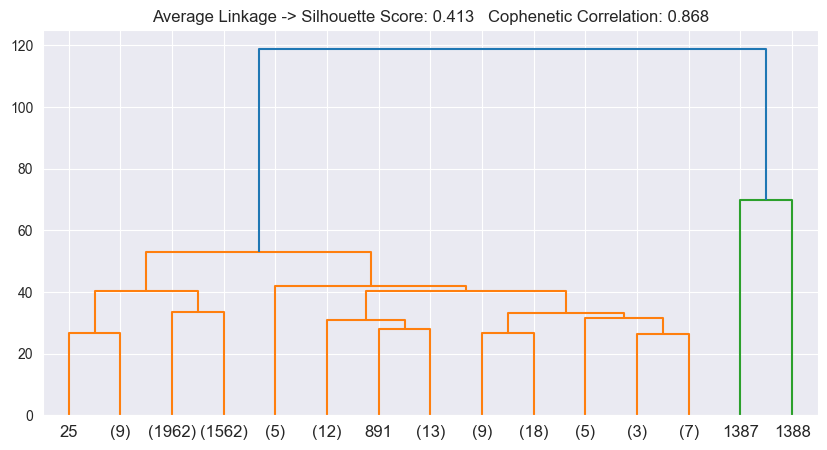

In [53]:
cophenetic_correlation_strs = []
silhouette_scores_strs = []

for linkage_method in ['single', 'complete', 'ward', 'centroid', 'average']:
    plt.figure(figsize=(10, 5))
    linkage_matrix = linkage(pca_data, 
                             method=linkage_method, 
                             metric='euclidean')
    dendrogram(linkage_matrix, p=15, truncate_mode='lastp')
    coph_corr, _ = cophenet(linkage_matrix, pdist(pca_data))
    cluster_labels = fcluster(linkage_matrix, t=optimum_clusters, criterion='maxclust')
    silhouette = silhouette_score(pca_data, cluster_labels)
    cophenetic_correlation_strs.append(f"Cophenetic Correlation for {linkage_method}: {coph_corr:.4f}")
    silhouette_scores_strs.append(f"Silhouette Score for {linkage_method}: {silhouette:.4f}")
    title_string = linkage_method.title() + " Linkage -> Silhouette Score: " + str(silhouette)[:5] + "   Cophenetic Correlation: " + str(coph_corr)[:5]
    plt.title(title_string)
    plt.show()

In [54]:
silhouette_scores_strs

['Silhouette Score for single: 0.4258',
 'Silhouette Score for complete: 0.2071',
 'Silhouette Score for ward: 0.2343',
 'Silhouette Score for centroid: 0.4167',
 'Silhouette Score for average: 0.4138']

In [55]:
cophenetic_correlation_strs

['Cophenetic Correlation for single: 0.7489',
 'Cophenetic Correlation for complete: 0.8188',
 'Cophenetic Correlation for ward: 0.7367',
 'Cophenetic Correlation for centroid: 0.8683',
 'Cophenetic Correlation for average: 0.8687']

In [56]:
agg_model = AgglomerativeClustering(n_clusters=optimum_clusters, linkage='average')
pca_data['Cluster'] = agg_model.fit_predict(pca_data)

In [57]:
silhouette = silhouette_score(pca_data, pca_data['Cluster'])
calinski_harabasz = calinski_harabasz_score(pca_data, pca_data['Cluster'])
davies_bouldin = davies_bouldin_score(pca_data, pca_data['Cluster'])

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.41473608643287063
Calinski-Harabasz Index: 107.8355310344433
Davies-Bouldin Index: 0.7796383298992394


In [58]:
# Calculate external metrics if ground truth is available
adjusted_rand = adjusted_rand_score(y, pca_data['Cluster'])
normalized_mutual_info = normalized_mutual_info_score(y, pca_data['Cluster'])

print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Normalized Mutual Information: {normalized_mutual_info}")

Adjusted Rand Index: 0.0031308674060789785
Normalized Mutual Information: 0.030747356232950447


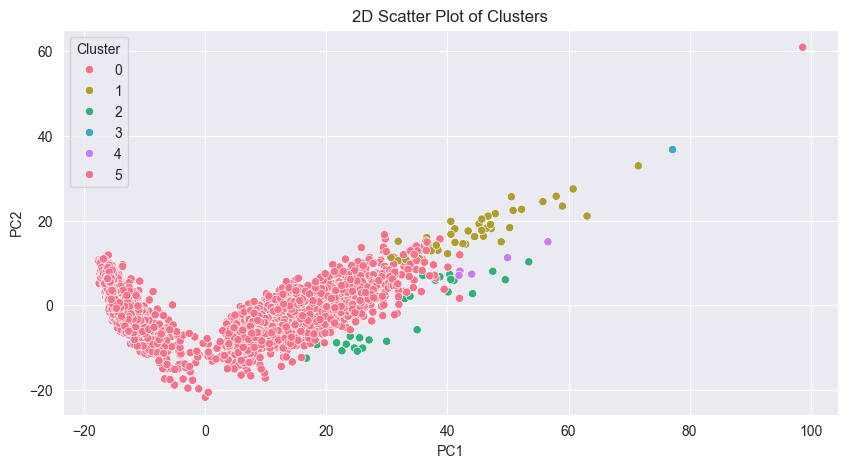

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_data, x='PC1', y='PC2', 
                hue='Cluster', 
                palette='husl')
plt.title('2D Scatter Plot of Clusters')
plt.show()

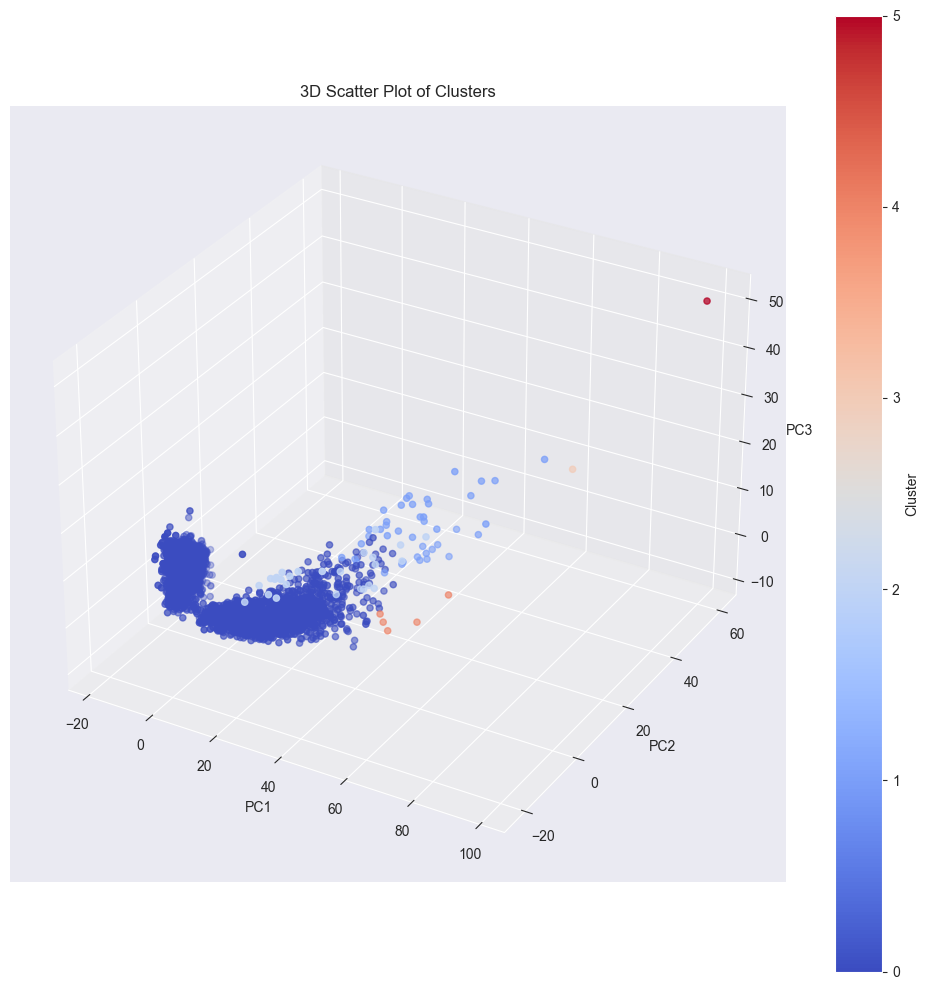

In [60]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], 
                     c=pca_data['Cluster'], 
                     cmap='coolwarm')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
fig.colorbar(scatter, label='Cluster')
ax.set_title('3D Scatter Plot of Clusters')
plt.tight_layout()
plt.show()

In [61]:
submission_df = pd.DataFrame({
    'Index': pca_data.index,
    'Cluster': pca_data['Cluster']
}).sort_values(by='Index', ascending=True)
display(submission_df.head(2))
display(submission_df.tail(2))

,Index,Cluster
0,0,0
1,1,0


,Index,Cluster
3607,3607,0
3608,3608,0


In [62]:
submission_df.to_csv('../d. Output Files/Human Activity Recognition/Human Activity Clustering.csv', index=False)